<a href="https://colab.research.google.com/github/aniketinamdar/Twitter-Bot/blob/main/Bot%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing necesaary libraries

In [1]:
!pip install Levenshtein
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing necessary libraries

In [2]:
import pandas as pd 
import numpy as np 
import os  
import matplotlib.pyplot as plt 
import Levenshtein as Lev 
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 
from sklearn.utils import shuffle
import datetime as dt  
from mlxtend.plotting import plot_decision_regions 
from itertools import product

#Reading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cresci/social_spambots_1.csv/social_spambots_1.csv/users.csv') 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  991 non-null    int64  
 1   name                                991 non-null    object 
 2   screen_name                         991 non-null    object 
 3   statuses_count                      991 non-null    int64  
 4   followers_count                     991 non-null    int64  
 5   friends_count                       991 non-null    int64  
 6   favourites_count                    991 non-null    int64  
 7   listed_count                        991 non-null    int64  
 8   url                                 22 non-null     object 
 9   lang                                991 non-null    object 
 10  time_zone                           903 non-null    object 
 11  location                            745 non-n

In [4]:
df = df.fillna('') 
df.iloc[:5,:20] 

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color
0,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,,it,Rome,,1.0,1.0,1.0,http://abs.twimg.com/sticky/default_profile_im...,,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333
1,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,Greenland,Italy,,,1.0,http://pbs.twimg.com/profile_images/2603147033...,https://pbs.twimg.com/profile_banners/33212890...,1.0,https://pbs.twimg.com/profile_background_image...,333333
2,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,,it,Rome,"iPhone: 45.471680,9.192429",,,,http://pbs.twimg.com/profile_images/2290354446...,https://pbs.twimg.com/profile_banners/39773427...,1.0,https://pbs.twimg.com/profile_background_image...,333333
3,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,,en,Pacific Time (US & Canada),"ÜT: 18.4698712,-69.9327525",,,,http://pbs.twimg.com/profile_images/3788000008...,https://pbs.twimg.com/profile_banners/57007623...,1.0,https://pbs.twimg.com/profile_background_image...,3E4415
4,63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,Rome,Firenze,,,1.0,http://pbs.twimg.com/profile_images/4633019422...,https://pbs.twimg.com/profile_banners/63258466...,1.0,https://pbs.twimg.com/profile_background_image...,D67345


In [5]:
df['default_profile'].isnull().values.sum() 
len(df['default_profile']) 
df.head() 

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1
0,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,,it,...,,,,,,Tue Mar 17 08:51:12 +0000 2009,2009-03-17 09:51:12,2014-04-19 14:46:19,2016-03-15 14:12:22,1
1,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,...,,,Autrice del libro #unavitatuttacurve dal 9 apr...,,,Sun Apr 19 14:38:04 +0000 2009,2009-04-19 16:38:04,2014-05-18 23:20:58,2016-03-15 14:17:13,1
2,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,,it,...,,,[Live Long and Prosper],,,Wed May 13 15:34:41 +0000 2009,2009-05-13 17:34:41,2014-05-13 23:21:54,2016-03-15 14:16:44,1
3,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,,en,...,,,"Cuasi Odontologa*♥,#Bipolar, #Sarcastica & Som...",,,Wed Jul 15 12:55:03 +0000 2009,2009-07-15 14:55:03,2014-05-19 23:24:18,2016-03-15 14:18:54,1
4,63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,...,,,"I shall rise from my own death, to avenge hers...",,,Wed Aug 05 21:12:49 +0000 2009,2009-08-05 23:12:49,2014-05-11 23:22:23,2016-03-15 14:17:05,1


In [6]:
real = pd.read_csv('/content/drive/MyDrive/cresci/genuine_accounts.csv/genuine_accounts.csv/users.csv') 
real = real.fillna('') 

In [7]:
fake_followers = pd.read_csv('/content/drive/MyDrive/cresci/fake_followers.csv/fake_followers.csv/users.csv') 
fake_followers.fillna('') 

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,updated
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,-18000.0,,,,,,real estate sales,,,2013-06-12 18:38:35
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,,...,-21600.0,,,,,,,,,2013-06-12 18:38:35
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,0.0,,,,,,le corna del capro scappato dal gregge s'infil...,,,2013-06-12 18:38:35
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,,...,-18000.0,,,,,,,,,2013-06-12 18:38:35
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,10800.0,,,,,,"MA student at JU, Interested in Juventus,Italy...",,,2013-06-11 17:39:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,Tue Apr 30 08:23:57 +0000 2013,,...,,,,,,,I have been in business onlin and offline for ...,,,2013-06-12 18:38:26
3347,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,Tue Apr 30 08:34:49 +0000 2013,,...,,,,,,,,,,2013-06-12 18:38:35
3348,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,Tue Apr 30 09:21:12 +0000 2013,,...,,,,,,,,,,2013-06-12 18:38:35
3349,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,Tue Apr 30 11:25:11 +0000 2013,,...,,,,,,,,,,2013-06-12 18:38:26


In [8]:
trad_spam_1 = pd.read_csv('/content/drive/MyDrive/cresci/traditional_spambots_1.csv/traditional_spambots_1.csv/users.csv') 
trad_spam_2 = pd.read_csv('/content/drive/MyDrive/cresci/traditional_spambots_2.csv/traditional_spambots_2.csv/users.csv') 
trad_spam_3 = pd.read_csv('/content/drive/MyDrive/cresci/traditional_spambots_3.csv/traditional_spambots_3.csv/users.csv') 
trad_spam_4 = pd.read_csv('/content/drive/MyDrive/cresci/traditional_spambots_4.csv/traditional_spambots_4.csv/users.csv')  

trad_spam_1 = trad_spam_1.fillna('') 
trad_spam_2 = trad_spam_2.fillna('') 
trad_spam_3 = trad_spam_3.fillna('') 
trad_spam_4 = trad_spam_4.fillna('') 

In [9]:
social_spam_1 = pd.read_csv('/content/drive/MyDrive/cresci/social_spambots_1.csv/social_spambots_1.csv/users.csv') 
social_spam_1 = social_spam_1.fillna('')  

social_spam_2 = pd.read_csv('/content/drive/MyDrive/cresci/social_spambots_2.csv/social_spambots_2.csv/users.csv') 
social_spam_2 = social_spam_2.fillna('')   

social_spam_3 = pd.read_csv('/content/drive/MyDrive/cresci/social_spambots_3.csv/social_spambots_3.csv/users.csv') 
social_spam_3 = social_spam_3.fillna('') 

In [10]:
real['knownbot'] = 0 
df['knownbot'] = 1 
fake_followers['knownbot'] = 1 
trad_spam_1['knownbot'] = 1 
trad_spam_2['knownbot'] = 1 
trad_spam_3['knownbot'] = 1 
trad_spam_4['knownbot'] = 1 
social_spam_1['knownbot'] = 1 
social_spam_2['knownbot'] = 1 
social_spam_3['knownbot'] = 1 

In [11]:
len(real['default_profile']) 

3474

# Number of Twitter Accounts Per Dataset

In [12]:
ss1 = len(social_spam_1) 
ss2 = len(social_spam_2) 
ss3 = len(social_spam_3) 
ts1 = len(trad_spam_1) 
ts2 = len(trad_spam_2) 
ts3 = len(trad_spam_3) 
r1 = len(real) 
f1 = len(fake_followers)

 # Average number of followers 

In [13]:
ss1 = social_spam_1['followers_count'].mean() 
ss2 = social_spam_2['followers_count'].mean() 
ss3 = social_spam_3['followers_count'].mean() 
ts1 = trad_spam_1['followers_count'].mean() 
ts2 = trad_spam_2['followers_count'].mean() 
ts3 = trad_spam_3['followers_count'].mean() 
r1 = real['followers_count'].mean() 
f1 = fake_followers['followers_count'].mean()

Text(0.5, 1.0, 'Average Number of Followers Per Account Per Dataset')

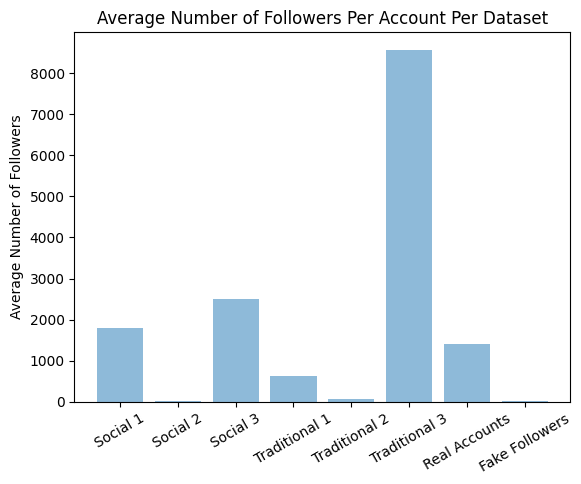

In [14]:
sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1] 
xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Traditional 2', 'Traditional 3', 'Real Accounts', 'Fake Followers') 
ypos = np.arange(len(sets)) 
amount = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1]  
plt.bar(xlabel, sets, align='center', alpha=0.5) 
plt.xticks(ypos,xlabel,rotation=30)
plt.ylabel('Average Number of Followers') 
plt.title('Average Number of Followers Per Account Per Dataset') 

# Average number of friends

In [15]:
ss1 = social_spam_1['friends_count'].mean() 
ss2 = social_spam_2['friends_count'].mean() 
ss3 = social_spam_3['friends_count'].mean() 
ts1 = trad_spam_1['friends_count'].mean() 
ts2 = trad_spam_2['friends_count'].mean() 
ts3 = trad_spam_3['friends_count'].mean() 
r1 = real['friends_count'].mean() 
f1 = fake_followers['friends_count'].mean() 

Text(0.5, 1.0, 'Average Number of Friends Per Account Per Dataset')

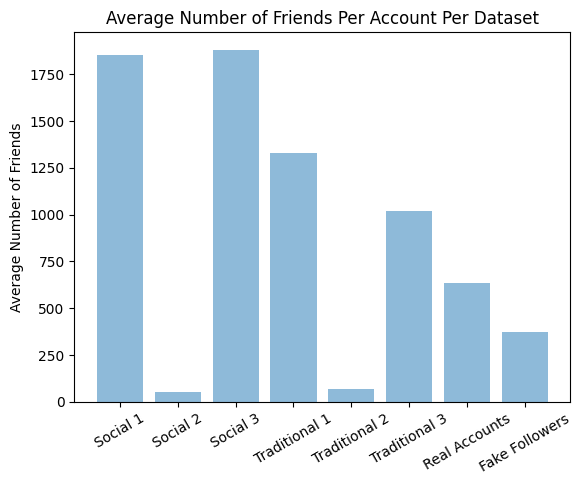

In [16]:
sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1] 
xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Traditional 2', 'Traditional 3', 'Real Accounts', 'Fake Followers') 
ypos = np.arange(len(sets)) 
amount = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1]  
plt.bar(xlabel, sets, align='center', alpha=0.5) 
plt.xticks(ypos,xlabel,rotation=30)
plt.ylabel('Average Number of Friends') 
plt.title('Average Number of Friends Per Account Per Dataset') 

 # Average number of Tweets

In [17]:
 ss1 = social_spam_1['statuses_count'].mean() 
 ss2 = social_spam_2['statuses_count'].mean() 
 ss3 = social_spam_3['statuses_count'].mean() 
 ts1 = trad_spam_1['statuses_count'].mean() 
 ts2 = trad_spam_2['statuses_count'].mean() 
 ts3 = trad_spam_3['statuses_count'].mean() 
 r1 = real['statuses_count'].mean() 
 f1 = fake_followers['statuses_count'].mean() 

Text(0.5, 1.0, 'Average Number of Tweets Per Account Per Dataset')

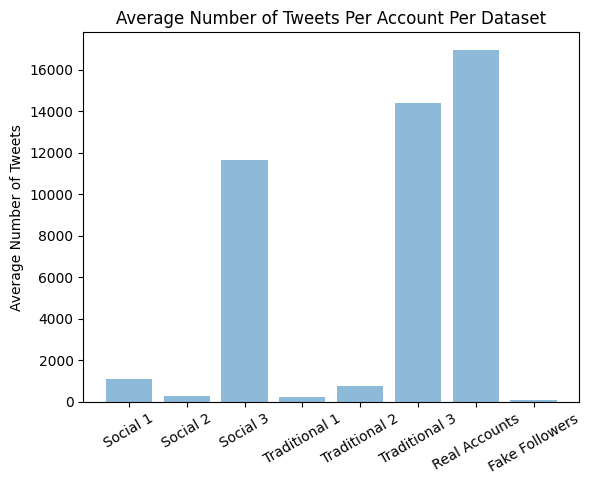

In [18]:
sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1] 
xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Traditional 2', 'Traditional 3', 'Real Accounts', 'Fake Followers') 
ypos = np.arange(len(sets)) 
amount = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1]  
plt.bar(xlabel, sets, align='center', alpha=0.5) 
plt.xticks(ypos,xlabel,rotation=30)
plt.ylabel('Average Number of Tweets') 
plt.title('Average Number of Tweets Per Account Per Dataset') 

# Average number of Favorites Per Dataset

In [19]:
ss1 = social_spam_1['favourites_count'].mean() 
ss2 = social_spam_2['favourites_count'].mean() 
ss3 = social_spam_3['favourites_count'].mean() 
ts1 = trad_spam_1['favourites_count'].mean() 
ts2 = trad_spam_2['favourites_count'].mean() 
ts3 = trad_spam_3['favourites_count'].mean() 
r1 = real['favourites_count'].mean() 
f1 = fake_followers['favourites_count'].mean() 

Text(0.5, 1.0, 'Average Number of Favorites Per Account Per Dataset')

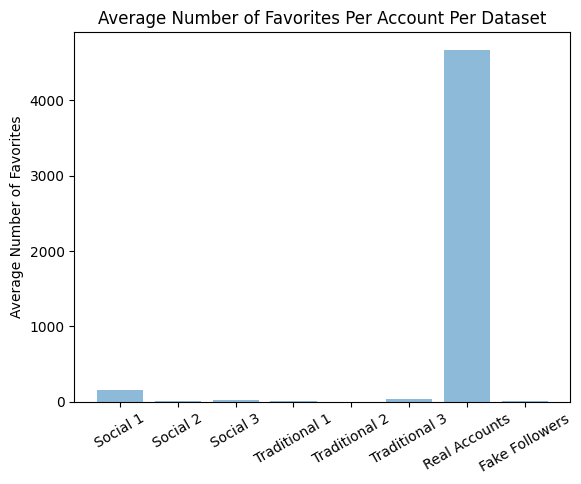

In [20]:
sets = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1] 
xlabel = ('Social 1', 'Social 2', 'Social 3', 'Traditional 1', 'Traditional 2', 'Traditional 3', 'Real Accounts', 'Fake Followers') 
ypos = np.arange(len(sets)) 
amount = [ss1,ss2,ss3,ts1,ts2,ts3,r1,f1]  
plt.bar(xlabel, sets, align='center', alpha=0.5) 
plt.xticks(ypos,xlabel,rotation=30)
plt.ylabel('Average Number of Favorites') 
plt.title('Average Number of Favorites Per Account Per Dataset') 

In [21]:
all_trad_spam = pd.concat([trad_spam_1,trad_spam_2,trad_spam_3])  
all_social_spambots = pd.concat([social_spam_1,social_spam_2,social_spam_3])  
all_bots = pd.concat([all_trad_spam,all_social_spambots,fake_followers]) 

In [22]:
df = pd.concat([df,real]) 

In [23]:
df = pd.concat([real, all_bots]) 

In [182]:
df['knownbot'].info


<bound method Series.info of 0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Name: knownbot, Length: 13240, dtype: int64>

In [24]:
len(df['default_profile']) 
df.head() 

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,knownbot
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,,ja,...,15years ago X.Lines24,,,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,,ja,...,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),,,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,,en,...,Let me see what your best move is!,,,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,20. menna: #farida #nyc and the 80s actually y...,,,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,,en,...,Cosmetologist,,,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0


If language is english

In [26]:
def scoring (row): 
  if row['lang'] == 'en':       
    return 1    
  else:       
    return 0 

In [27]:
df.apply (lambda row: scoring (row),axis=1)  

0       0
1       0
2       1
3       1
4       1
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [28]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)  

In [29]:
df['score'].isnull().values.sum() 

0

#Creating a new dataframe Score

In [30]:
score = pd.DataFrame() 
score['id'] = df['id'] 

In [31]:
score['lang-en'] = df.apply (lambda row: scoring (row),axis=1) 

In [76]:
score['id']

0       1502026416
1       2492782375
2        293212315
3        191839658
4       3020965143
           ...    
3346    1391497074
3347    1391544607
3348    1391622127
3349    1391832212
3350    1391998039
Name: id, Length: 13240, dtype: int64

If there a profile image or not

In [32]:
def scoring (row):    
  if row['profile_image_url'] == '':       
    return 1    
  else:       
    return 0 

In [33]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3346    0
3347    0
3348    0
3349    0
3350    0
Length: 13240, dtype: int64

In [34]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [35]:
df['score'].isnull().values.sum()

0

In [36]:
score['profile_pic'] = df.apply (lambda row: scoring (row),axis=1)

In [37]:
score['profile_pic'].tail() 

3346    0
3347    0
3348    0
3349    0
3350    0
Name: profile_pic, dtype: int64

If there is no user name

In [38]:
def scoring (row):    
  if row['name'] == '':       
    return 1    
  else:       
    return 0 

In [39]:
df.apply (lambda row: scoring (row),axis=1)  

0       0
1       0
2       0
3       0
4       0
       ..
3346    0
3347    0
3348    0
3349    0
3350    0
Length: 13240, dtype: int64

In [40]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)

In [41]:
df['score'].isnull().values.sum()

0

In [42]:
score['has_screen_name'] = df.apply (lambda row: scoring (row),axis=1) 

In [43]:
score['has_screen_name'].head()

0    0
1    0
2    0
3    0
4    0
Name: has_screen_name, dtype: int64

If follower counts are less than 30

In [45]:
def scoring (row):    
  if row['followers_count'] < 30:       
    return 1    
  else:       
    return 0 

In [46]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       1
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [47]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)

In [48]:
df['score'].isnull().values.sum() 

0

In [49]:
score['30followers'] = df.apply (lambda row: scoring (row),axis=1) 

In [50]:
score['30followers'].head()

0    0
1    0
2    0
3    0
4    1
Name: 30followers, dtype: int64

If geolocation is enabled

In [51]:
def scoring (row):    
  if row['geo_enabled'] == '':       return 1    
  else:       return 0

In [52]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       1
3       0
4       1
       ..
3346    0
3347    0
3348    0
3349    0
3350    0
Length: 13240, dtype: int64

In [53]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [54]:
df['score'].isnull().values.sum() 

0

In [55]:
score['geoloc'] = df.apply (lambda row: scoring (row),axis=1) 

In [56]:
score['geoloc'].head() 

0    0
1    0
2    1
3    0
4    1
Name: geoloc, dtype: int64

profile banner contains a link ('http') 

In [57]:
def scoring (row):    
  if row['profile_banner_url'] == '':       
    return 0    
  else:       
    return 1 

In [58]:
df.apply (lambda row: scoring (row),axis=1) 

0       1
1       1
2       1
3       1
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [59]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [60]:
df['score'].isnull().values.sum() 

0

In [61]:
score['banner_link'] = df.apply (lambda row: scoring (row),axis=1) 

In [62]:
score['banner_link'].head() 

0    1
1    1
2    1
3    1
4    0
Name: banner_link, dtype: int64

Has more than 50 tweets

In [63]:
def scoring (row):    
  if row['statuses_count'] > 50:       
    return 0    
  else:       return 1 

In [64]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [65]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [66]:
df['score'].isnull().values.sum() 

0

In [67]:
score['50tweets'] = df.apply (lambda row: scoring (row),axis=1) 

In [68]:
score['50tweets'].head()

0    0
1    0
2    0
3    0
4    0
Name: 50tweets, dtype: int64

Friends follower ratio

In [69]:
def scoring (row):    
  if 2*row['followers_count'] >= row['friends_count']:       return 0    
  else:       return 1 

In [70]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       1
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [71]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [72]:
df['score'].isnull().values.sum() 

0

In [73]:
score['twice_num_followers'] = df.apply (lambda row: scoring (row),axis=1)

In [74]:
score['twice_num_followers'].head() 

0    0
1    0
2    0
3    0
4    1
Name: twice_num_followers, dtype: int64

does not have 1000s of friends, spambot 

In [75]:
def scoring (row):    
  if row['friends_count'] > 1000:       return 1    
  else:       return 0

In [77]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3346    0
3347    0
3348    0
3349    0
3350    0
Length: 13240, dtype: int64

In [78]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [79]:
df['score'].isnull().values.sum() 

0

In [80]:
score['1000friends'] = df.apply (lambda row: scoring (row),axis=1) 

In [81]:
score['1000friends'].head() 

0    0
1    0
2    0
3    0
4    0
Name: 1000friends, dtype: int64

sent less than 20 tweets, spambot 

In [83]:
def scoring (row):    
  if row['statuses_count'] < 20:       return 1    
  else:       return 0 

In [84]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [86]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)

In [87]:
df['score'].isnull().values.sum() 

0

In [88]:
score['1000friends'] = df.apply (lambda row: scoring (row),axis=1) 

In [89]:
score['1000friends'].head() 

0    0
1    0
2    0
3    0
4    0
Name: 1000friends, dtype: int64

Default profile

In [90]:
def scoring (row):    
  if row['default_profile_image'] == '':       return 0    
  else:       return 1      

In [91]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [92]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)

In [93]:
df['score'].isnull().values.sum() 

0

In [94]:
score['profile_pic'] = df.apply (lambda row: scoring (row),axis=1) 

In [95]:
score['profile_pic'].head() 

0    0
1    0
2    0
3    0
4    0
Name: profile_pic, dtype: int64

Never tweeted

In [96]:
def scoring (row):    
  if row['statuses_count'] == 0:       return 1    
  else:       return 0

In [97]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3346    0
3347    1
3348    0
3349    0
3350    1
Length: 13240, dtype: int64

In [98]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [99]:
df['score'].isnull().values.sum() 

0

In [100]:
score['NeverTweeted'] = df.apply (lambda row: scoring (row),axis=1) 

In [101]:
score['NeverTweeted'].head() 

0    0
1    0
2    0
3    0
4    0
Name: NeverTweeted, dtype: int64

follower following ratio

In [103]:
def scoring (row): 
  if 50*row['followers_count'] <= row['friends_count']:       return 1    
  else:       return 0 

In [104]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    0
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [105]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [106]:
df['score'].isnull().values.sum() 

0

In [107]:
score['fifty_FriendsFollowersRatio'] = df.apply (lambda row: scoring (row),axis=1) 

In [109]:
score['fifty_FriendsFollowersRatio'].head()

0    0
1    0
2    0
3    0
4    0
Name: fifty_FriendsFollowersRatio, dtype: int64

100:1 friends/followers  

In [110]:
def scoring (row):    
  if 100*row['followers_count'] <= row['friends_count']:       return 1    
  else:       return 0 

In [111]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    0
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [113]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [114]:
df['score'].isnull().values.sum() 

0

In [115]:
score['hundred_FriendsFollowersRatio'] = df.apply (lambda row: scoring (row),axis=1)

In [116]:
score['hundred_FriendsFollowersRatio'].head() 

0    0
1    0
2    0
3    0
4    0
Name: hundred_FriendsFollowersRatio, dtype: int64

profile with description

In [117]:
def scoring (row):    
  if row['description'] == '':       return 1    
  else:       return 0 

In [118]:
df.apply (lambda row: scoring (row),axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
3346    0
3347    0
3348    0
3349    0
3350    0
Length: 13240, dtype: int64

In [120]:
df['score'] = df.apply (lambda row: scoring (row),axis=1) 

In [121]:
df['score'].isnull().values.sum() 

0

In [122]:
score['has_description'] = df.apply (lambda row: scoring (row),axis=1) 

In [123]:
score['has_description'].head() 

0    0
1    0
2    0
3    0
4    0
Name: has_description, dtype: int64

Known bot

In [124]:
def scoring (row):    
  if row['knownbot'] == 1:       return 1    
  else:       return 0 

In [125]:
df.apply (lambda row: scoring (row),axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3346    1
3347    1
3348    1
3349    1
3350    1
Length: 13240, dtype: int64

In [126]:
df['score'] = df.apply (lambda row: scoring (row),axis=1)

In [127]:
df['score'].isnull().values.sum()

0

In [128]:
score['knownbot'] = df.apply (lambda row: scoring (row),axis=1) 

In [129]:
score['knownbot'].head() 

0    0
1    0
2    0
3    0
4    0
Name: knownbot, dtype: int64

In [130]:
score.shape 

(13240, 15)

In [131]:
score.describe() 

,id,lang-en,profile_pic,has_screen_name,30followers,geoloc,banner_link,50tweets,twice_num_followers,1000friends,NeverTweeted,fifty_FriendsFollowersRatio,hundred_FriendsFollowersRatio,has_description,knownbot
count,1.324000e+04,13240.000000,13240.000000,13240.000000,13240.000000,13240.000000,13240.000000,13240.000000,13240.000000,13240.000000,13240.00000,13240.000000,13240.00000,13240.000000,13240.000000
mean,1.209061e+09,0.798112,0.258308,0.000076,0.556420,0.579909,0.532100,0.389804,0.654079,0.143656,0.01065,0.077039,0.05642,0.352795,0.737613
std,9.816362e+08,0.401424,0.437721,0.008691,0.496825,0.493592,0.498987,0.487724,0.475686,0.350753,0.10265,0.266664,0.23074,0.477858,0.439948
min,6.780330e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,3.337846e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
50%,9.017673e+08,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
75%,2.356624e+09,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,1.000000,1.000000
max,4.331280e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000


#Model

In [132]:
from sklearn.model_selection import ShuffleSplit

if 'knownbot' in score:
  y = score['knownbot'].values 
  del score['knownbot']
  X = score.values 

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size = 0.2)
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [163]:
for col in score.columns:
    print(col)

id
lang-en
profile_pic
has_screen_name
30followers
geoloc
banner_link
50tweets
twice_num_followers
1000friends
NeverTweeted
fifty_FriendsFollowersRatio
hundred_FriendsFollowersRatio
has_description


In [136]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) 

In [138]:
iter_num=0 
for train_indices, test_indices in cv_object.split(X,y):     
  X_train = X[train_indices]     
  y_train = y[train_indices]          
  X_test = X[test_indices]    
  y_test = y[test_indices]         
  lr_clf.fit(X_train,y_train) 
  y_hat = lr_clf.predict(X_test)     
  acc = mt.accuracy_score(y_test,y_hat)     
  conf = mt.confusion_matrix(y_test,y_hat)     
  print("Iteration",iter_num)     
  print("accuracy", acc )     
  print("confusion matrix\n",conf)     
  iter_num+=1 

Iteration 0
accuracy 0.7367824773413897
confusion matrix
 [[   0  697]
 [   0 1951]]
Iteration 1
accuracy 0.7224320241691843
confusion matrix
 [[   0  735]
 [   0 1913]]
Iteration 2
accuracy 0.7273413897280967
confusion matrix
 [[   0  722]
 [   0 1926]]


In [139]:
weights = lr_clf.coef_.T
variable_names = score.columns 
for coef, name in zip(weights,variable_names):     
  print(name, 'has weight of', coef[0]) 

id has weight of 7.293389803218404e-10
lang-en has weight of 1.1203563253250928e-19
profile_pic has weight of 2.0525356564206856e-18
has_screen_name has weight of -1.6264292421855361e-21
30followers has weight of 3.112428171897854e-18
geoloc has weight of 1.5353991812280929e-18
banner_link has weight of -1.0198989142329338e-18
50tweets has weight of 2.7156685208572918e-18
twice_num_followers has weight of 3.2676242689087147e-18
1000friends has weight of 1.2053975526135132e-18
NeverTweeted has weight of 9.4644581209472e-20
fifty_FriendsFollowersRatio has weight of 6.721588496429359e-19
hundred_FriendsFollowersRatio has weight of 4.768968841386055e-19
has_description has weight of 1.3208392059282928e-18


In [140]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
scl_obj = StandardScaler() 
scl_obj.fit(X_train) 

In [172]:
X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

In [173]:
lr_clf = LogisticRegression(penalty='l2', C=0.05) 
lr_clf.fit(X_train_scaled,y_train)

LogisticRegression(C=0.05)

In [174]:
y_hat = lr_clf.predict(X_test_scaled)

In [175]:
acc = mt.accuracy_score(y_test,y_hat) 
conf = mt.confusion_matrix(y_test,y_hat) 
print('accuracy:', acc ) 
print(conf ) 

accuracy: 0.9531722054380665
[[ 606   70]
 [  54 1918]]


In [146]:
zip_vars = zip(lr_clf.coef_.T,score.columns)
zip_vars = sorted(zip_vars) 
for coef, name in zip_vars:     
  print(name, 'has weight of', coef[0]) 

banner_link has weight of -1.7432624997127413
lang-en has weight of -0.7623755294504199
has_description has weight of -0.20572340651745047
has_screen_name has weight of -0.03387003518445633
NeverTweeted has weight of 0.0663560564883215
1000friends has weight of 0.11735908690160345
twice_num_followers has weight of 0.1332168887812092
hundred_FriendsFollowersRatio has weight of 0.20299177454578693
fifty_FriendsFollowersRatio has weight of 0.2840287655070238
50tweets has weight of 0.4869855282743872
id has weight of 0.6068822729630278
30followers has weight of 0.7488496528418566
geoloc has weight of 1.1893583486730055
profile_pic has weight of 2.733861797007906


In [147]:
from matplotlib import pyplot as plt 
get_ipython().magic('matplotlib inline')

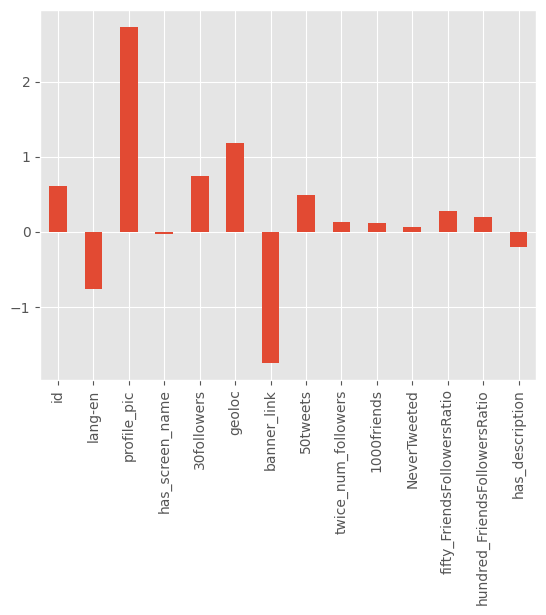

In [149]:
plt.style.use('ggplot')   
weights = pd.Series(lr_clf.coef_[0],index=score.columns) 
weights.plot(kind='bar') 
plt.show() 

In [150]:
from sklearn.pipeline import Pipeline 
std_scl = StandardScaler() 
lr_clf = LogisticRegression(penalty='l2', C=0.05)    
piped_object = Pipeline([('scale', std_scl),('logit_model', lr_clf)])
weights = [] 

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):     
  piped_object.fit(X[train_indices],y[train_indices])  
  weights.append(piped_object.named_steps['logit_model'].coef_[0])       
weights = np.array(weights) 

In [153]:
import plotly
error_y=dict(type='data',array=np.std(weights,axis=0),visible=True)  
graph1 = {'x': score.columns,'y': np.mean(weights,axis=0),'error_y':error_y,'type': 'bar'}  
fig = dict() 
fig['data'] = [graph1] 
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}  
plotly.offline.iplot(fig) 

In [154]:
for train_indices, test_indices in cv_object.split(X,y):      
  X_train = X[train_indices]     
  y_train = y[train_indices]          
  X_test = X[test_indices]     
  y_test = y[test_indices]      
  X_train_scaled = scl_obj.transform(X_train) 
  X_test_scaled = scl_obj.transform(X_test) 

In [155]:
score.head() 

,id,lang-en,profile_pic,has_screen_name,30followers,geoloc,banner_link,50tweets,twice_num_followers,1000friends,NeverTweeted,fifty_FriendsFollowersRatio,hundred_FriendsFollowersRatio,has_description
0,1502026416,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2492782375,0,0,0,0,0,1,0,0,0,0,0,0,0
2,293212315,1,0,0,0,1,1,0,0,0,0,0,0,0
3,191839658,1,0,0,0,0,1,0,0,0,0,0,0,0
4,3020965143,1,0,0,1,1,0,0,1,0,0,0,0,0


In [157]:
from sklearn.svm import SVC  
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
svm_clf.fit(X_train_scaled, y_train)  
y_hat = svm_clf.predict(X_test_scaled) 
acc = mt.accuracy_score(y_test,y_hat) 
conf = mt.confusion_matrix(y_test,y_hat) 
print('accuracy:', acc ) 
print(conf) 

accuracy: 0.9599697885196374
[[ 627   49]
 [  57 1915]]


In [183]:
id = int(input("Enter id : "))

language = input("English(en)/Hindi(hi)/Marathi(mr) : ")
if language == 'en':
  lang_input = 1
else:
  lang_input = 0

profile_image_url = input("Enter url for profile image : ")
if profile_image_url=='':
  profile_image_url_input = 1
else :
  profile_image_url_input = 0

screen_name = input("Enter screen name : ")
if screen_name=='':
  screen_name_input = 1
else :
  screen_name_input = 0

follower_count = int(input("Enter follower count : "))
if follower_count<30:
  follower_count_input = 1
else :
  follower_count_input = 0

geolocation = input("Enter if geo enabled (T-Yes/ F-No) : ")
if geolocation =='F':
  geolocation_input=1
else:
  geolocation_input=0

profile_banner = input("Enter url for profile banner : ")
if profile_banner=='':
  profile_banner_input = 0
else :
  profile_banner_input = 1

tweet_count = int(input("Enter tweet count : "))
if tweet_count>50:
  tweet_count_input = 0
else :
  tweet_count_input = 1

friend_count = int(input("Enter friend count : "))
if 2*follower_count>=friend_count:
  twice_num_followers_input = 0
else :
  twice_num_followers_input = 1


if friend_count>1000:
  thousand_or_more_friends_input = 1
else :
  thousand_or_more_friends_input = 0

num_tweets_posted = int(input("Enter number of tweets posted : "))
if num_tweets_posted == 0:
  posted_notposted_input = 1
else :
  posted_notposted_input = 0

if 50*follower_count<=friend_count:
  fifty_follower_friend_input =1
else :
  fifty_follower_friend_input =0

if 100*follower_count<=friend_count:
  hundred_follower_friend_input =1
else :
  hundred_follower_friend_input =0

description = input("Enter profile bio : ")
if description=='':
  description_input = 1
else :
  description_input = 0

Enter id : 105916557
English(en)/Hindi(hi)/Marathi(mr) : en
Enter url for profile image : https://pbs.twimg.com/profile_images/632916759557840896/35puTLF2_normal.jpg
Enter screen name : CBirckner
Enter follower count : 60
Enter if geo enabled (T-Yes/ F-No) : T
Enter url for profile banner : https://abs.twimg.com/images/themes/theme3/bg.gif
Enter tweet count : 260
Enter friend count : 128
Enter number of tweets posted : 1038
Enter profile bio : Television producer. Emmy Award winner. Disney enthusiast. ZBB followers. Kitty crazy.


In [184]:
input_data = [[id,lang_input,profile_image_url_input,screen_name_input,follower_count_input,geolocation_input,profile_banner_input,tweet_count_input,twice_num_followers_input,thousand_or_more_friends_input,posted_notposted_input,fifty_follower_friend_input,hundred_follower_friend_input,description_input]]

In [185]:
new_data_scaled = scl_obj.transform(input_data)
predicted_label = lr_clf.predict(new_data_scaled)
if predicted_label==1:
  print("Bot")
else :
  print("not a bot")

not a bot
